In [1]:
import scanpy as sc
import anndata
import os
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import sys
sys.path.insert(0,"../helper_code")
import plotting_helpers as ph

plt.rcParams["figure.figsize"]=(6,6)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
print("Scanpy version " + sc.__version__)
print("UMAP version " + umap.__version__)
print("Pandas version " +pd.__version__)
print("Numpy version "+np.__version__)

Scanpy version 1.7.2
UMAP version 0.5.1
Pandas version 1.1.5
Numpy version 1.19.2


In [2]:
t_adata_nodub=sc.read_h5ad("analysis_objects/nkt_nodoublets.h5ad")

<AxesSubplot:title={'center':'NK/T clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

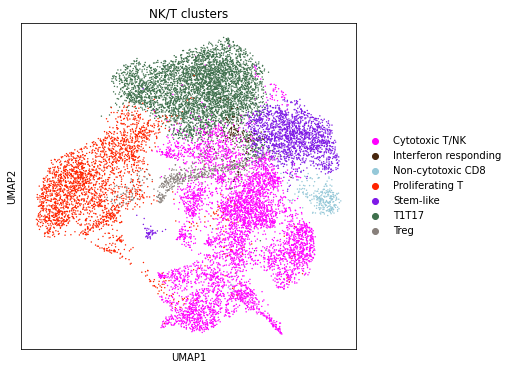

In [6]:
sc.pl.umap(t_adata_nodub,color="NK/T clusters", show=False)


<AxesSubplot:title={'center':'NK/T Subclusters'}, xlabel='UMAP1', ylabel='UMAP2'>

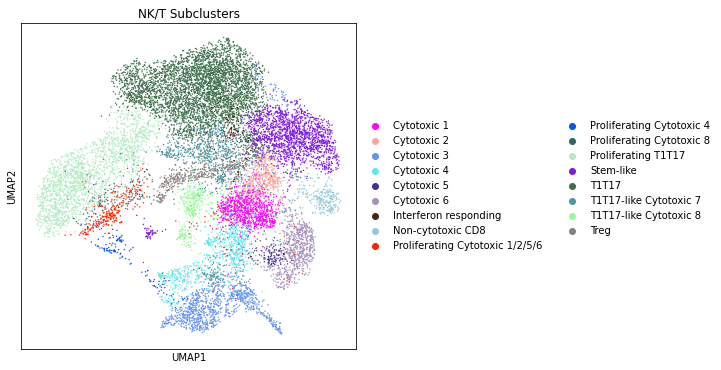

In [14]:
sc.pl.umap(t_adata_nodub,color="NK/T Subclusters", show=False)


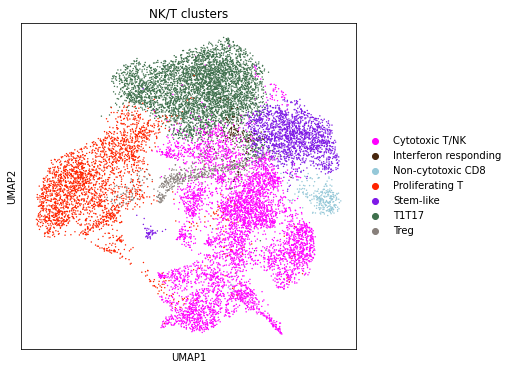

In [7]:
#Part A umap
sc.pl.umap(t_adata_nodub,color="NK/T clusters", show=False)
plt.savefig("plots/t_cell_marker_genes/Fig4A_T_major_umap.png",bbox_inches="tight")
plt.savefig("plots/t_cell_marker_genes/Fig4A_T_major_umap.pdf",bbox_inches="tight")

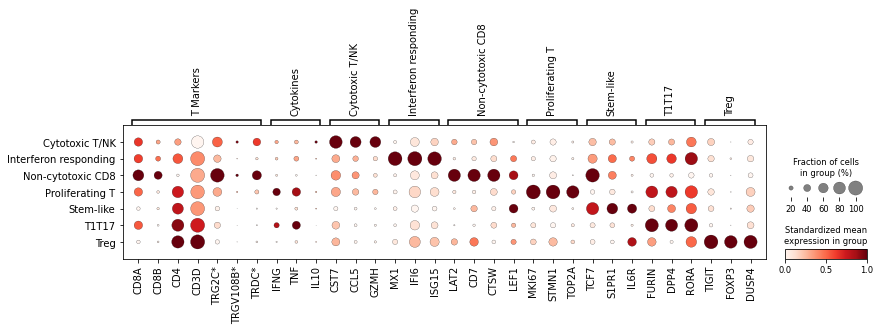

In [25]:
#Figure 6 B dotplot
major_T_marker_genes = {"T Markers":["CD8A","CD8B","CD4","CD3D","LOC102128672","LOC107129205","LOC102115168"],
                        "Cytokines":["IFNG","TNF","IL10"],
                        "Cytotoxic T/NK":["CST7","CCL5","GZMH"],"Interferon responding":["MX1","IFI6","ISG15"],
                       "Non-cytotoxic CD8":["LAT2","CD7","CTSW","LEF1"],"Proliferating T":["MKI67","STMN1","TOP2A"],
                       "Stem-like":["TCF7","S1PR1","IL6R"],
                       "T1T17":["FURIN","DPP4","RORA"],"Treg":["TIGIT","FOXP3","DUSP4"]}
ax=sc.pl.dotplot(t_adata_nodub,var_names=major_T_marker_genes,groupby="NK/T clusters",show=False,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')
fmp.replace_rankgenesgroups_dotplot_locs(ax)
plt.savefig("plots/t_cell_marker_genes/Fig4B_T_major_curated_dotplot_w_cytokines.png",bbox_inches="tight")
plt.savefig("plots/t_cell_marker_genes/Fig4B_T_major_curated_dotplot_w_cytokines.pdf",bbox_inches="tight")

In [9]:
# Tables for part b: marker genes
#sc.tl.rank_genes_groups(t_adata_nodub, groupby="NK/T clusters",method="wilcoxon",pts=True)
#sc.tl.filter_rank_genes_groups(t_adata_nodub,min_in_group_fraction=.6,max_out_group_fraction=.7)
ph.save_filtered_rankgenesgroups(t_adata_nodub,"tables/differential_genes/t_cells/nk_t_major_differential_genes/")

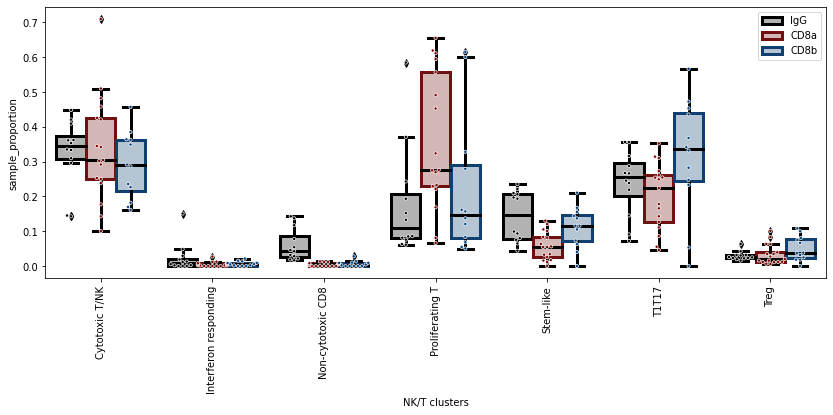

In [11]:
# Part C boxplot
ph.boxplot_sample_proportions(t_adata_nodub, "sample", "NK/T clusters",figsize=(14,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True)
plt.savefig("plots/t_cell_umaps/Fig4C_major_tnk_boxplot.pdf",bbox_inches="tight")
plt.savefig("plots/t_cell_umaps/Fig4C_major_tnk_boxplot.png",bbox_inches="tight")

In [12]:
# tables for part c: counts, proportions, means, stds

celltype_counts = t_adata_nodub.obs.groupby(["sample","NK/T clusters"])["NK/T clusters"].count().unstack("NK/T clusters").fillna(0)
celltype_counts.to_csv("tables/nkt_major_cell_cluster_counts_by_sample.csv")
celltype_proportions = celltype_counts.divide(celltype_counts.sum(axis=1),axis=0)
celltype_meta = pd.read_csv("tables/metadata_by_sample.csv",index_col=0)
celltype_proportions.columns = celltype_proportions.columns.astype(str)
#celltype_proportions["M.Number"] = celltype_meta.loc[celltype_proportions.index,"M.Number"]
celltype_proportions["treatment"] = celltype_meta["treatment"]
celltype_proportions.to_csv("tables/nkt_major_cell_cluster_proportions_by_sample.csv")

In [13]:
# mean proportions by treatment
celltype_proportions.groupby(['treatment']).mean()

NK/T clusters,Cytotoxic T/NK,Interferon responding,Non-cytotoxic CD8,Proliferating T,Stem-like,T1T17,Treg
treatment,,,,,,,
CD8a,0.338354,0.005514,0.004809,0.360168,0.058122,0.200205,0.032828
CD8b,0.289158,0.006915,0.006431,0.221438,0.110635,0.315434,0.049988
IgG,0.326334,0.023536,0.061289,0.177548,0.143365,0.238359,0.029569


In [14]:
celltype_proportions.groupby(['treatment']).mean().to_csv("tables/mean_nkt_major_cell_cluster_proportions_by_treatment.csv")

In [15]:
# standard deviation proportions by treatment
celltype_proportions.groupby(['treatment']).std()

NK/T clusters,Cytotoxic T/NK,Interferon responding,Non-cytotoxic CD8,Proliferating T,Stem-like,T1T17,Treg
treatment,,,,,,,
CD8a,0.151539,0.006996,0.004818,0.195874,0.040114,0.094225,0.028621
CD8b,0.095673,0.006971,0.008402,0.199434,0.058819,0.166628,0.035031
IgG,0.096107,0.042664,0.046473,0.157536,0.072152,0.093429,0.012787


In [16]:
celltype_proportions.groupby(['treatment']).std().to_csv("tables/standard_deviation_nkt_major_cell_cluster_proportions_by_treatment.csv")

In [17]:
# standard error of mean proportions by treatment
celltype_proportions.groupby(['treatment']).sem()

NK/T clusters,Cytotoxic T/NK,Interferon responding,Non-cytotoxic CD8,Proliferating T,Stem-like,T1T17,Treg
treatment,,,,,,,
CD8a,0.036754,0.001697,0.001168,0.047506,0.009729,0.022853,0.006942
CD8b,0.027618,0.002012,0.002425,0.057572,0.016980,0.048102,0.010113
IgG,0.027744,0.012316,0.013416,0.045477,0.020828,0.026971,0.003691


In [18]:
celltype_proportions.groupby(['treatment']).sem().to_csv("tables/sem_nkt_major_cell_cluster_proportions_by_treatment.csv")

In [40]:
# tables for part c: counts, proportions, means, stds -> for the subclusters

celltype_counts = t_adata_nodub.obs.groupby(["sample","NK/T Subclusters"])["NK/T Subclusters"].count().unstack("NK/T Subclusters").fillna(0)
celltype_counts.to_csv("tables/nkt_all_subcluster_counts_by_sample.csv")
celltype_proportions = celltype_counts.divide(celltype_counts.sum(axis=1),axis=0)
celltype_meta = pd.read_csv("tables/metadata_by_sample.csv",index_col=0)
celltype_proportions.columns = celltype_proportions.columns.astype(str)
#celltype_proportions["M.Number"] = celltype_meta.loc[celltype_proportions.index,"M.Number"]
celltype_proportions["treatment"] = celltype_meta["treatment"]
celltype_proportions.to_csv("tables/nkt_all_subcluster_proportions_by_sample.csv")

In [41]:
# mean proportions by treatment
celltype_proportions.groupby(['treatment']).mean()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1/2/5/6,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.022974,0.023660,0.051814,0.066045,0.000387,0.079480,0.005514,0.004809,0.057682,0.026922,0.014681,0.260883,0.058122,0.200205,0.053449,0.040545,0.032828
CD8b,0.032342,0.032828,0.072168,0.028544,0.005811,0.012622,0.006915,0.006431,0.025508,0.015568,0.001903,0.178459,0.110635,0.315434,0.094354,0.010488,0.049988
IgG,0.107345,0.022227,0.060045,0.010724,0.017301,0.005981,0.023536,0.061289,0.026048,0.004862,0.003478,0.143159,0.143365,0.238359,0.095758,0.006954,0.029569


In [42]:
celltype_proportions.groupby(['treatment']).mean().to_csv("tables/mean_nkt_all_subcluster_proportions_by_treatment.csv")

In [43]:
# standard deviation proportions by treatment
celltype_proportions.groupby(['treatment']).std()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1/2/5/6,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.019792,0.014757,0.048808,0.064311,0.001241,0.096329,0.006996,0.004818,0.061015,0.022788,0.014957,0.147092,0.040114,0.094225,0.027622,0.035910,0.028621
CD8b,0.031149,0.018869,0.052620,0.028890,0.006599,0.018031,0.006971,0.008402,0.021757,0.021977,0.003903,0.158752,0.058819,0.166628,0.102769,0.009329,0.035031
IgG,0.070605,0.014367,0.024389,0.014924,0.011130,0.007102,0.042664,0.046473,0.029115,0.008009,0.004929,0.119451,0.072152,0.093429,0.043006,0.005162,0.012787


In [44]:
celltype_proportions.groupby(['treatment']).std().to_csv("tables/standard_deviation_nkt_all_subcluster_proportions_by_treatment.csv")

In [45]:
# standard error of mean proportions by treatment
celltype_proportions.groupby(['treatment']).sem()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1/2/5/6,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.004800,0.003579,0.011838,0.015598,0.000301,0.023363,0.001697,0.001168,0.014798,0.005527,0.003628,0.035675,0.009729,0.022853,0.006699,0.008709,0.006942
CD8b,0.008992,0.005447,0.015190,0.008340,0.001905,0.005205,0.002012,0.002425,0.006281,0.006344,0.001127,0.045828,0.016980,0.048102,0.029667,0.002693,0.010113
IgG,0.020382,0.004147,0.007041,0.004308,0.003213,0.002050,0.012316,0.013416,0.008405,0.002312,0.001423,0.034483,0.020828,0.026971,0.012415,0.001490,0.003691


In [46]:
celltype_proportions.groupby(['treatment']).sem().to_csv("tables/sem_nkt_all_subcluster_proportions_by_treatment.csv")

In [15]:
t_adata_nodub.obs["Cytotoxic Subclusters"] = t_adata_nodub.obs["NK/T Subclusters"].map({'Proliferating Cytotoxic 4':"nan",
 'Proliferating T1T17':"nan",
 'Cytotoxic 4':'Cytotoxic 4',
 'Treg':"nan",
 'Proliferating Cytotoxic 1':"nan",
 'Cytotoxic 3':'Cytotoxic 3',
 'T1T17':"nan",
 'T1T17-like Cytotoxic 8':'T1T17-like Cytotoxic 8',
 'Stem-like':"nan",
 'T1T17-like Cytotoxic 7':'T1T17-like Cytotoxic 7',
 'Cytotoxic 5':'Cytotoxic 5',
 'Cytotoxic 2':'Cytotoxic 2',
 'Cytotoxic 1':'Cytotoxic 1',
 'Interferon responding':"nan",
 'Proliferating Cytotoxic 9':"nan",
 'Non-cytotoxic CD8':"nan",
 'Cytotoxic 6':'Cytotoxic 6'})
color_dict = fmp.colors_from_spreadsheet("NK/T Subclusters",celltype_col="new_name_3",value_col='color')

hh.set_colors_from_dict(t_adata_nodub, color_dict, "Cytotoxic Subclusters")
cytotoxic_t = t_adata_nodub[t_adata_nodub.obs["Cytotoxic Subclusters"]!="nan"]

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [11]:
sc.tl.rank_genes_groups(cytotoxic_t, groupby="Cytotoxic Subclusters",method="wilcoxon",pts=True)
sc.tl.filter_rank_genes_groups(cytotoxic_t,min_in_group_fraction=.6,max_out_group_fraction=.7)
ph.save_filtered_rankgenesgroups(cytotoxic_t,"tables/differential_genes/t_cells/nk_t_cytotoxic_differential_genes/")

Trying to set attribute `.uns` of view, copying.


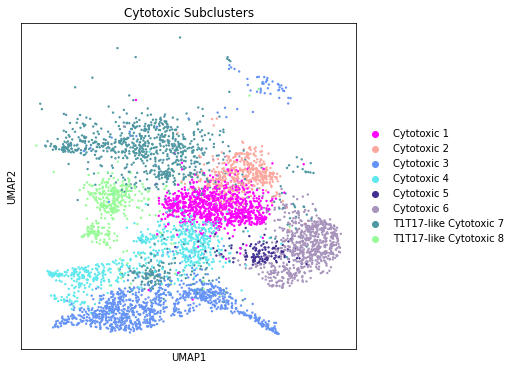

In [211]:
#Figure 6D
sc.pl.umap(cytotoxic_t,color="Cytotoxic Subclusters",show=False)
plt.savefig("plots/t_cell_umaps/Fig4Di_cytotoxic_subclusters_umap.pdf",bbox_inches="tight")
plt.savefig("plots/t_cell_umaps/Fig4Di_cytotoxic_subclusters_umap.png",bbox_inches="tight")

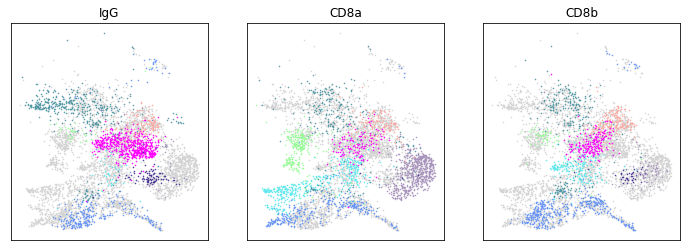

In [212]:
#Figure 6D
ph.split_umap_by_category(cytotoxic_t, groupby="treatment",colorby="Cytotoxic Subclusters",nrows=1,ncols=3,cat_order=["IgG","CD8a","CD8b"])
plt.savefig("plots/t_cell_umaps/Fig4Dii_cytotoxic_clusters_split_by_condition.pdf",bbox_inches="tight")
plt.savefig("plots/t_cell_umaps/Fig4Dii_cytotoxic_clusters_split_by_condition.png",bbox_inches="tight")

In [21]:
sc.tl.dendrogram(cytotoxic_t, groupby="NK/T Subclusters",var_names=cytotoxic_T_markers)

Trying to set attribute `.uns` of view, copying.


categories: Cytotoxic 1, Cytotoxic 2, Cytotoxic 3, etc.
var_group_labels: CD8A, CD8B, CD4, etc.


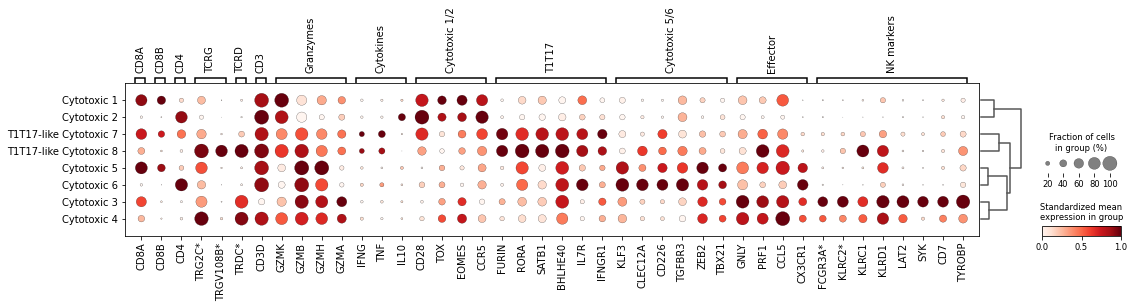

In [26]:
#Figure 6E
cytotoxic_T_markers={"CD8A":["CD8A"],"CD8B":["CD8B"],"CD4":["CD4"],"TCRG":["LOC102128672","LOC107129205"],
   "TCRD":["LOC102115168"],"CD3":["CD3D"],"Granzymes":["GZMK","GZMB","GZMH","GZMA"],"Cytokines":["IFNG","TNF","IL10"],
                     "Cytotoxic 1/2":["CD28","TOX","EOMES","CCR5"],
    "T1T17":["FURIN","RORA","SATB1","BHLHE40","IL7R","IFNGR1"],"Cytotoxic 5/6":["KLF3","CLEC12A","CD226","TGFBR3","ZEB2","TBX21"],
    "Effector":["GNLY","PRF1","CCL5","CX3CR1"],"NK markers":["LOC102140945","LOC102132533","KLRC1","KLRD1","LAT2","SYK","CD7","TYROBP"]}
ax=sc.pl.dotplot(cytotoxic_t, groupby="NK/T Subclusters",var_names=cytotoxic_T_markers,show=False,dendrogram=True,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')
fmp.replace_rankgenesgroups_dotplot_locs(ax)
plt.savefig("plots/t_cell_marker_genes/Fig4E_T_cytotoxic_cluster_curated_dotplot_w_cytokines.png",bbox_inches="tight")
plt.savefig("plots/t_cell_marker_genes/Fig4E_T_cytotoxic_cluster_curated_dotplot_w_cytokines.pdf",bbox_inches="tight")

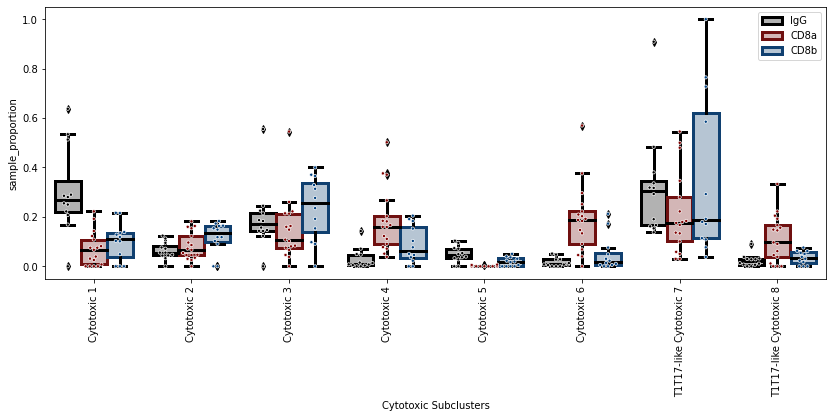

In [15]:
#Figure 6F
cph.boxplot_sample_proportions(cytotoxic_t, "sample", "Cytotoxic Subclusters",figsize=(14,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True)
plt.savefig("plots/t_cell_umaps/Fig4F_cytotoxic_subclusters_boxplot.pdf",bbox_inches="tight")
plt.savefig("plots/t_cell_umaps/Fig4F_cytotoxic_subclusters_boxplot.png",bbox_inches="tight")

In [51]:
importlib.reload(cph)

<module 'condition_plotting_helpers' from '/data/cb/nyquist/cd8_deplete/condition_plotting_helpers.py'>

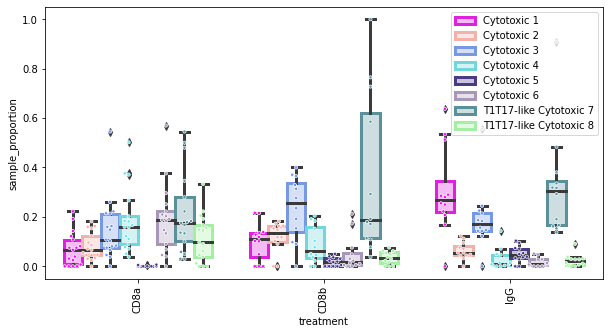

In [35]:
cph.boxplot_sample_proportions(cytotoxic_t, "sample", "Cytotoxic Subclusters",hue="treatment",figsize=(10,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True,swap=True)
plt.savefig("plots/t_cell_umaps/Fig4Fi_cytotoxic_subclusters_boxplot_celltype_colors.pdf",bbox_inches="tight")
plt.savefig("plots/t_cell_umaps/Fig4Fi_cytotoxic_subclusters_boxplot_celltype_colors.png",bbox_inches="tight")

In [30]:
prolif_t = t_adata_nodub[t_adata_nodub.obs["NK/T clusters"]=="Proliferating T"]

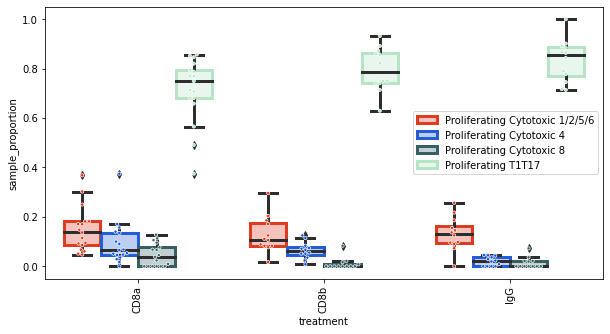

In [33]:
cph.boxplot_sample_proportions(prolif_t, "sample", "NK/T Subclusters",hue="treatment",figsize=(10,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True,swap=True)
plt.savefig("plots/t_cell_umaps/FigS9_prolif_t_boxplot_by_treatment.pdf",bbox_inches="tight")


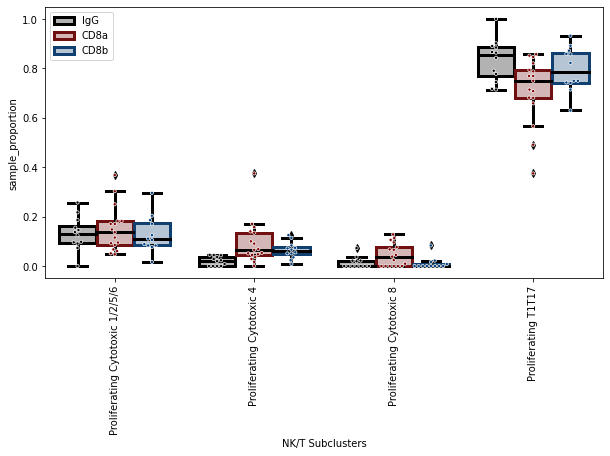

In [34]:
cph.boxplot_sample_proportions(prolif_t, "sample", "NK/T Subclusters",hue="treatment",figsize=(10,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True,swap=False)
plt.savefig("plots/t_cell_umaps/FigS9_prolif_t_boxplot_by_cluster.pdf",bbox_inches="tight")


In [251]:
# tables for counts, proportions, means, stds over cytotoxic, non-proliferating subclusters

celltype_counts = cytotoxic_t.obs.groupby(["sample","Cytotoxic Subclusters"])["Cytotoxic Subclusters"].count().unstack("Cytotoxic Subclusters").fillna(0)
celltype_counts.to_csv("tables/nkt_cytotoxic_cell_subcluster_counts_by_sample.csv")
celltype_proportions = celltype_counts.divide(celltype_counts.sum(axis=1),axis=0)
celltype_meta = pd.read_csv("tables/metadata_by_sample.csv",index_col=0)
celltype_proportions.columns = celltype_proportions.columns.astype(str)
#celltype_proportions["M.Number"] = celltype_meta.loc[celltype_proportions.index,"M.Number"]
celltype_proportions["treatment"] = celltype_meta["treatment"]
celltype_proportions.to_csv("tables/nkt_cytotoxic_cell_subcluster_proportions_by_sample.csv")

In [244]:
celltype_proportions= celltype_proportions.loc[celltype_counts.sum(axis=1) >50]

In [195]:
celltype_counts.sum(axis=1)

sample
Array1_28918    430
Array1_29218    186
Array1_29318    265
Array1_29818     11
Array1_30518    202
Array2_28918    258
Array2_29218    239
Array2_29318     15
Array2_29818     18
Array2_30518     52
Array3_28918     22
Array3_29218     74
Array3_29318    117
Array3_29818    106
Array3_30518     44
Array4_28918     49
Array4_29218    179
Array4_29318    256
Array4_29818     21
Array4_30518     82
Array5_28918      9
Array6_28818     17
Array6_29118     14
Array6_29618    204
Array6_30218    178
Array6_30418    142
Array7_28818     79
Array7_29118     25
Array7_29618    138
Array7_30218    175
Array7_30418    131
Array8_28818     65
Array8_29118     11
Array8_29618    306
Array8_30218    195
Array8_30418    252
Array9_28818      5
Array9_29118     26
Array9_29618    153
Array9_30218    360
Array9_30418    182
dtype: int64

In [17]:
# mean proportions by treatment
celltype_proportions.groupby(['treatment']).mean()

Cytotoxic Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8
treatment,,,,,,,,
CD8a,0.070055,0.081448,0.148768,0.184312,0.000727,0.189188,0.212898,0.112606
CD8b,0.100393,0.117996,0.235497,0.088997,0.018440,0.049971,0.354238,0.034468
IgG,0.303730,0.063202,0.193688,0.030204,0.048584,0.016240,0.320641,0.023712


In [18]:
celltype_proportions.groupby(['treatment']).mean().to_csv("tables/mean_nkt_cytotoxic_cell_subcluster_proportions_by_treatment.csv")

In [19]:
# standard deviation proportions by treatment
celltype_proportions.groupby(['treatment']).std()

Cytotoxic Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8
treatment,,,,,,,,
CD8a,0.068800,0.055647,0.125904,0.128023,0.002071,0.137969,0.164670,0.095016
CD8b,0.075881,0.062164,0.128958,0.075951,0.017912,0.070889,0.325696,0.026870
IgG,0.176106,0.035014,0.130134,0.042397,0.033046,0.018278,0.214204,0.024915


In [20]:
celltype_proportions.groupby(['treatment']).std().to_csv("tables/standard_deviation_nkt_cytotoxic_cell_subcluster_proportions_by_treatment.csv")

In [21]:
# standard error of mean proportions by treatment
celltype_proportions.groupby(['treatment']).sem()

Cytotoxic Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8
treatment,,,,,,,,
CD8a,0.016686,0.013496,0.030536,0.031050,0.000502,0.033462,0.039938,0.023045
CD8b,0.021905,0.017945,0.037227,0.021925,0.005171,0.020464,0.094020,0.007757
IgG,0.050837,0.010108,0.037566,0.012239,0.009539,0.005277,0.061835,0.007192


In [22]:
celltype_proportions.groupby(['treatment']).sem().to_csv("tables/sem_nkt_cytotoxic_cell_subcluster_proportions_by_treatment.csv")

In [23]:
# tables for counts, proportions, means, stds over all subclusters

celltype_counts = t_adata_nodub.obs.groupby(["sample","NK/T Subclusters"])["NK/T Subclusters"].count().unstack("NK/T Subclusters").fillna(0)
celltype_counts.to_csv("tables/nkt_cell_subcluster_counts_by_sample.csv")
celltype_proportions = celltype_counts.divide(celltype_counts.sum(axis=1),axis=0)
celltype_meta = pd.read_csv("tables/metadata_by_sample.csv",index_col=0)
celltype_proportions.columns = celltype_proportions.columns.astype(str)
#celltype_proportions["M.Number"] = celltype_meta.loc[celltype_proportions.index,"M.Number"]
celltype_proportions["treatment"] = celltype_meta["treatment"]
celltype_proportions.to_csv("tables/nkt_cell_subcluster_proportions_by_sample.csv")

In [24]:
# mean proportions by treatment
celltype_proportions.groupby(['treatment']).mean()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.022974,0.023660,0.051814,0.066045,0.000387,0.079480,0.005514,0.004809,0.057682,0.026922,0.014681,0.260883,0.058122,0.200205,0.053449,0.040545,0.032828
CD8b,0.032342,0.032828,0.072168,0.028544,0.005811,0.012622,0.006915,0.006431,0.025508,0.015568,0.001903,0.178459,0.110635,0.315434,0.094354,0.010488,0.049988
IgG,0.107345,0.022227,0.060045,0.010724,0.017301,0.005981,0.023536,0.061289,0.026048,0.004862,0.003478,0.143159,0.143365,0.238359,0.095758,0.006954,0.029569


In [25]:
celltype_proportions.groupby(['treatment']).mean().to_csv("tables/mean_nkt_cell_subcluster_proportions_by_treatment.csv")

In [26]:
# standard deviation proportions by treatment
celltype_proportions.groupby(['treatment']).std()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.019792,0.014757,0.048808,0.064311,0.001241,0.096329,0.006996,0.004818,0.061015,0.022788,0.014957,0.147092,0.040114,0.094225,0.027622,0.035910,0.028621
CD8b,0.031149,0.018869,0.052620,0.028890,0.006599,0.018031,0.006971,0.008402,0.021757,0.021977,0.003903,0.158752,0.058819,0.166628,0.102769,0.009329,0.035031
IgG,0.070605,0.014367,0.024389,0.014924,0.011130,0.007102,0.042664,0.046473,0.029115,0.008009,0.004929,0.119451,0.072152,0.093429,0.043006,0.005162,0.012787


In [27]:
celltype_proportions.groupby(['treatment']).std().to_csv("tables/standard_deviation_nkt_cell_subcluster_proportions_by_treatment.csv")

In [28]:
# standard error of mean proportions by treatment
celltype_proportions.groupby(['treatment']).sem()

NK/T Subclusters,Cytotoxic 1,Cytotoxic 2,Cytotoxic 3,Cytotoxic 4,Cytotoxic 5,Cytotoxic 6,Interferon responding,Non-cytotoxic CD8,Proliferating Cytotoxic 1,Proliferating Cytotoxic 4,Proliferating Cytotoxic 8,Proliferating T1T17,Stem-like,T1T17,T1T17-like Cytotoxic 7,T1T17-like Cytotoxic 8,Treg
treatment,,,,,,,,,,,,,,,,,
CD8a,0.004800,0.003579,0.011838,0.015598,0.000301,0.023363,0.001697,0.001168,0.014798,0.005527,0.003628,0.035675,0.009729,0.022853,0.006699,0.008709,0.006942
CD8b,0.008992,0.005447,0.015190,0.008340,0.001905,0.005205,0.002012,0.002425,0.006281,0.006344,0.001127,0.045828,0.016980,0.048102,0.029667,0.002693,0.010113
IgG,0.020382,0.004147,0.007041,0.004308,0.003213,0.002050,0.012316,0.013416,0.008405,0.002312,0.001423,0.034483,0.020828,0.026971,0.012415,0.001490,0.003691


In [29]:
celltype_proportions.groupby(['treatment']).sem().to_csv("tables/sem_nkt_cell_subcluster_proportions_by_treatment.csv")

categories: Cytotoxic T/NK, Interferon responding, Non-cytotoxic CD8, etc.
var_group_labels: CD8A, CD8B, CD4, etc.


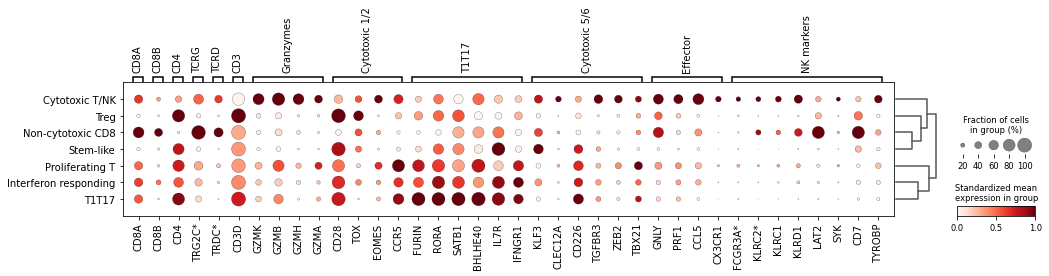

In [30]:
#Figure 6B
ax=sc.pl.dotplot(t_adata_nodub, groupby="NK/T clusters",var_names=cytotoxic_T_markers,show=False,dendrogram=True,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')
fmp.replace_rankgenesgroups_dotplot_locs(ax)



### Analysis for Figure 6G

In [8]:
def make_scores_from_file(adata, filename, sep='\t'):
    '''
    For use if the genelists are in a single file where the column names, score names, and the 
    rows are a bunch of genes (since genelists will be different lengths, this leads to a bunch 
    of empty entries in genelists and a lot of warnings but it doesnt matter)
    '''
    gene_lists = pd.read_csv(filename, sep=sep)
    for s in gene_lists:
        sc.tl.score_genes(adata, gene_lists[s], score_name=s,use_raw=True)
    return gene_lists.columns # returns column names so you can see what the names of the scores are

In [43]:
make_scores_from_file(cytotoxic_t, "41467_2019_12464_MOESM7_ESM.csv",sep=",")

Trying to set attribute `.obs` of view, copying.


Index(['Treg', 'CD4 NV/CM', 'CD4/CD8', 'IFN Response', 'Proliferation',
       'CD8 Cytotoxic', 'CD8 Cytokine'],
      dtype='object')

In [69]:
import scipy.stats
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 1"]),"CD8 Cytotoxic"],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 2"]),"CD8 Cytotoxic"],alternative="greater")

MannwhitneyuResult(statistic=336904.0, pvalue=2.8261601532306567e-84)

In [70]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 3"]),"CD8 Cytotoxic"],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 4"]),"CD8 Cytotoxic"],alternative="greater")

MannwhitneyuResult(statistic=422886.0, pvalue=4.8029377504234474e-11)

In [71]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 5"]),"CD8 Cytotoxic"],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 6"]),"CD8 Cytotoxic"],alternative="greater")

MannwhitneyuResult(statistic=75442.0, pvalue=1.3429914308579843e-28)

In [72]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["T1T17-like Cytotoxic 8"]),"CD8 Cytotoxic"],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["T1T17-like Cytotoxic 7"]),"CD8 Cytotoxic"],alternative="greater")

MannwhitneyuResult(statistic=291876.0, pvalue=3.3867431790365035e-65)

In [63]:
import scipy.stats
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 1"]),"CD8 Cytotoxic"],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 2"]),'CD8 Cytokine'],alternative="greater")

MannwhitneyuResult(statistic=373828.0, pvalue=2.1417012873980133e-136)

In [59]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 3"]),'CD8 Cytokine'],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 4"]),"CD8 Cytotoxic"],alternative="less")

MannwhitneyuResult(statistic=102447.0, pvalue=1.2562099762080773e-139)

In [58]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 5"]),'CD8 Cytokine'],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["Cytotoxic 6"]),"CD8 Cytotoxic"], alternative="less")

MannwhitneyuResult(statistic=36427.0, pvalue=2.635214459742293e-05)

In [62]:
scipy.stats.mannwhitneyu(cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["T1T17-like Cytotoxic 8"]),'CD8 Cytokine'],cytotoxic_t.obs.loc[cytotoxic_t.obs["NK/T Subclusters"].isin(["T1T17-like Cytotoxic 7"]),"CD8 Cytotoxic"],alternative="greater")

MannwhitneyuResult(statistic=233170.0, pvalue=2.0507255777916167e-15)

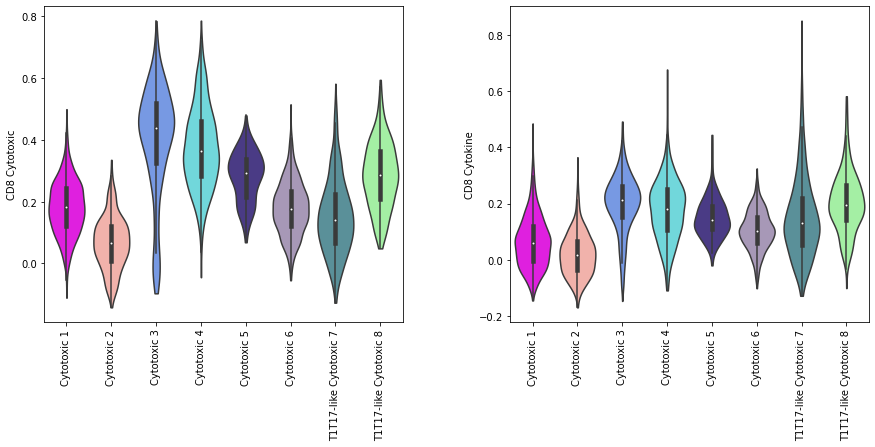

In [67]:
#Figure 6G
sc.pl.violin(cytotoxic_t,['CD8 Cytotoxic', 'CD8 Cytokine'], groupby="NK/T Subclusters", rotation=90,show=False,stripplot=False,inner="box")
#plt.savefig("plots/t_cell_umaps/Fig4G_cytotoxic_cytokine_scores.pdf",bbox_inches="tight")
#plt.savefig("plots/t_cell_umaps/Fig4G_cytotoxic_cytokine_scores.png",bbox_inches="tight")

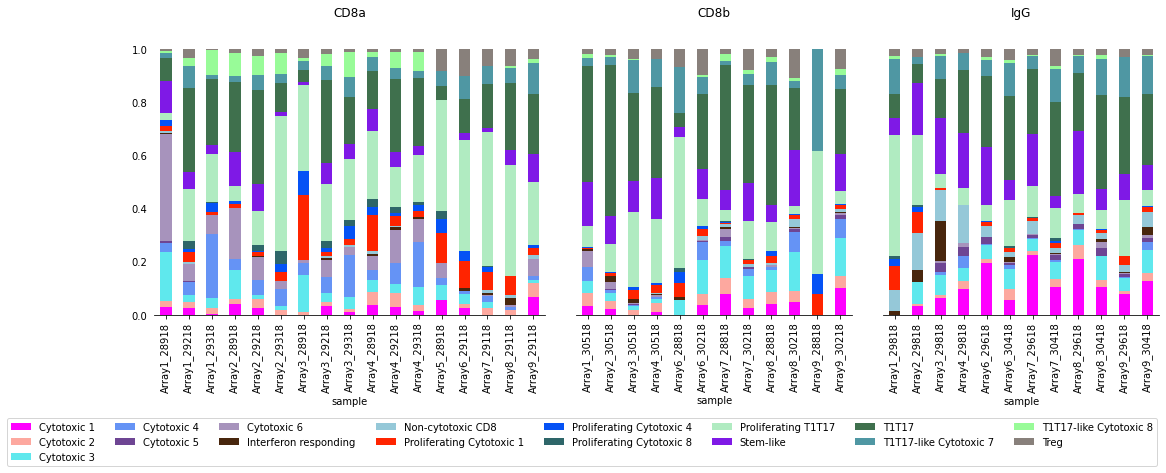

In [263]:
cph.grouped_stacked_bars(t_adata_nodub, "treatment","sample","NK/T Subclusters",normalized=True)

categories: Cytotoxic 1, Cytotoxic 2, Cytotoxic 3, etc.
var_group_labels: CD8A, CD8B, CD4, etc.


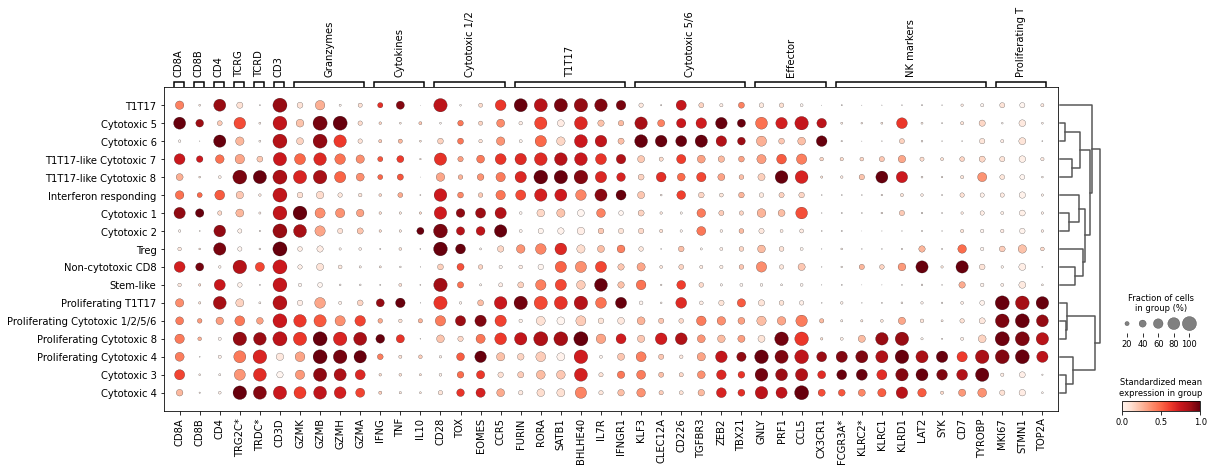

In [38]:
#S4F
cytotoxic_T_markers={"CD8A":["CD8A"],"CD8B":["CD8B"],"CD4":["CD4"],"TCRG":["LOC102128672"],
   "TCRD":["LOC102115168"],"CD3":["CD3D"],"Granzymes":["GZMK","GZMB","GZMH","GZMA"],"Cytokines":["IFNG","TNF","IL10"],
                     "Cytotoxic 1/2":["CD28","TOX","EOMES","CCR5"],
    "T1T17":["FURIN","RORA","SATB1","BHLHE40","IL7R","IFNGR1"],"Cytotoxic 5/6":["KLF3","CLEC12A","CD226","TGFBR3","ZEB2","TBX21"],
    "Effector":["GNLY","PRF1","CCL5","CX3CR1"],"NK markers":["LOC102140945","LOC102132533","KLRC1","KLRD1","LAT2","SYK","CD7","TYROBP"],"Proliferating T":["MKI67","STMN1","TOP2A"]}
ax=sc.pl.dotplot(t_adata_nodub, groupby="NK/T Subclusters",var_names=cytotoxic_T_markers,show=False,dendrogram=True,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')
pl.replace_rankgenesgroups_dotplot_locs(ax)
plt.savefig("plots/t_cell_marker_genes/FigS7_all_t_subsets_dotplot.pdf",bbox_inches="tight")


In [9]:
make_scores_from_file(t_adata_nodub, "41467_2019_12464_MOESM7_ESM.csv",sep=",")

Index(['Treg', 'CD4 NV/CM', 'CD4/CD8', 'IFN Response', 'Proliferation',
       'CD8 Cytotoxic', 'CD8 Cytokine'],
      dtype='object')

In [284]:
t_adata_nodub.obs["NK/T Subclusters"] = t_adata_nodub.obs["NK/T Subclusters"].astype("category")


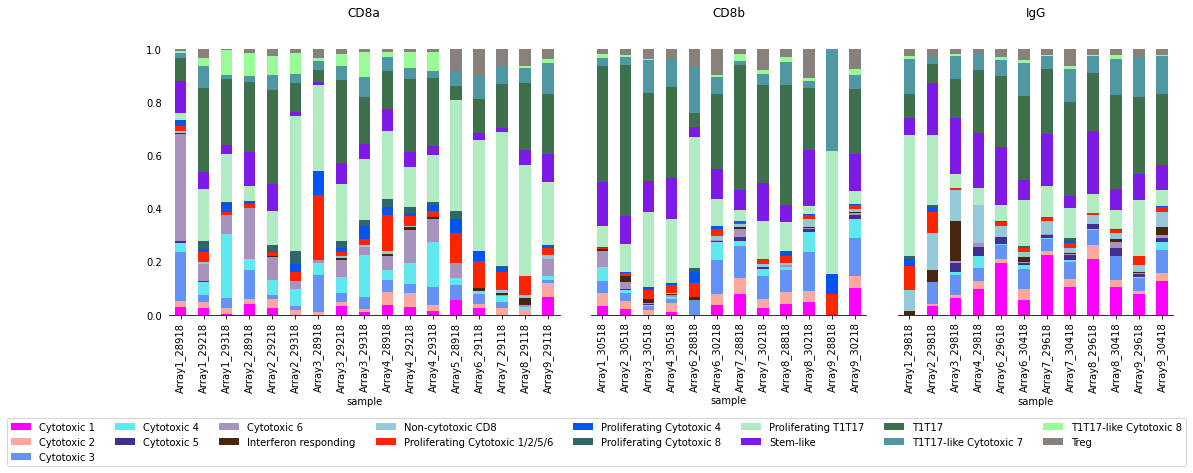

In [19]:
cph.grouped_stacked_bars(t_adata_nodub, "treatment","sample","NK/T Subclusters",normalized=True)
plt.savefig("plots/t_cell_umaps/S9_t_subcluster_stacked_bar.pdf", bbox_inches="tight")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_c

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


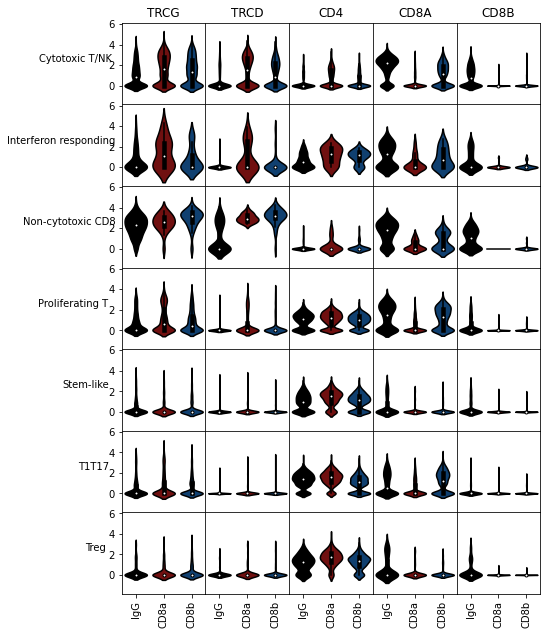

In [11]:
#Figure 7B
genenames = {"LOC102128672":"TRCG","LOC102115168":"TRCD","CD4":"CD4","CD8A":"CD8A","CD8B":"CD8B"}
cat = "treatment"
vertical_split = "NK/T clusters"
fmp.condition_split_violin(t_adata_nodub,cat,vertical_split,genenames,violin_order = ["IgG","CD8a","CD8b"])

plt.savefig("plots/t_cell_umaps/FigS6D_lineage_exp_by_cluster_violin.pdf",bbox_inches="tight")